### 1. Importation des packages

In [2]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### 2. Chargement des données

In [5]:
# Chargement des données
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

### 3. Graphiques adaptés pour les variables qualitatives 

#### 3.1 Graphiques adaptés pour les variables nominales

#### 3.1.1 Diagramme en barres

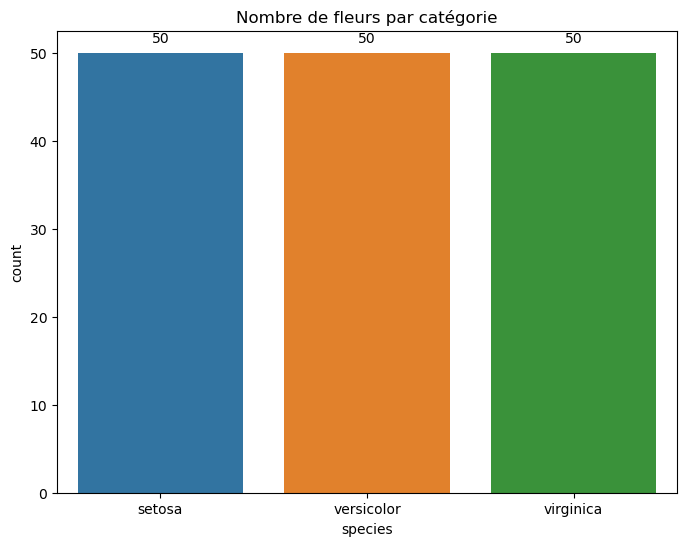

In [10]:
# Graphique en barres pour la fréquence de chaque catégorie
plt.figure(figsize=(8, 6))  # <--- Définir la taille du cadre (il manquait une parenthèse fermante)
ax = sns.countplot(x="species", data=iris)
plt.title("Nombre de fleurs par catégorie")

# Ajouter le nombre de chaque catégorie sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".0f"), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()  # <--- Afficher le graphique

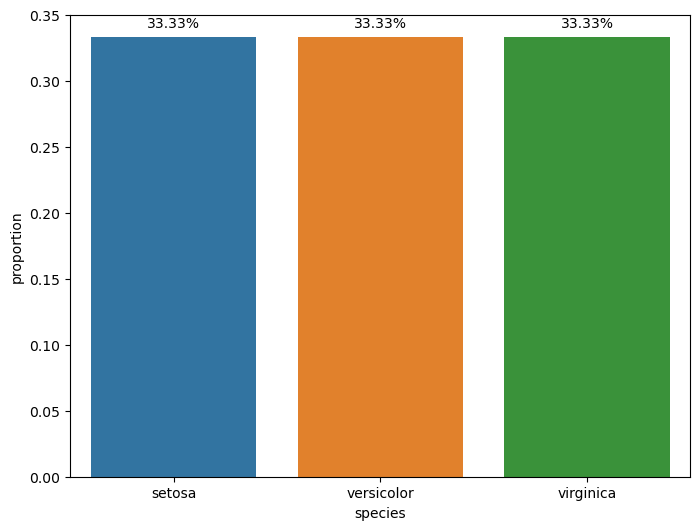

In [16]:
# Calculer la proportion de chaque catégorie
prop_df = iris["species"].value_counts(normalize=True).reset_index()
prop_df.columns = ["species", "proportion"]  

# Créer le graphique en barres
plt.figure(figsize=(8, 6))  # <--- Définir la taille du cadre
ax = sns.barplot(x="species", y="proportion", data=prop_df)

# Ajouter les proportions sur les barres
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2%"),  # Afficher la proportion en pourcentage avec 2 décimales
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position de l'annotation
        ha='center', va='center', xytext=(0, 10), textcoords='offset points'
    )

plt.show()  # Afficher le graphique

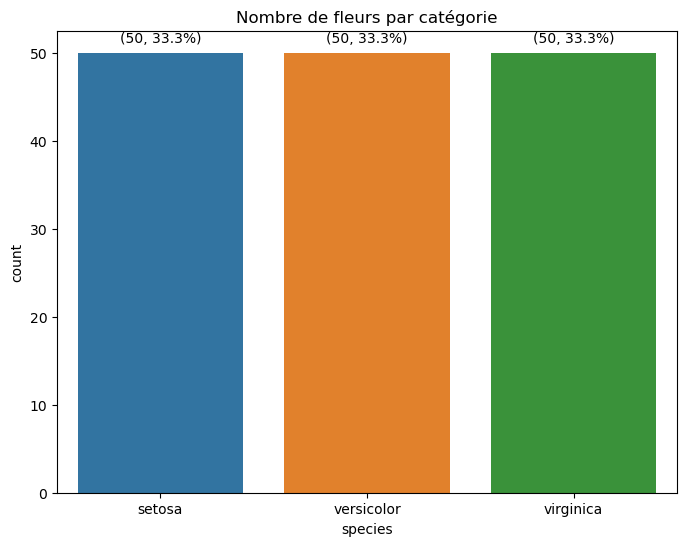

In [28]:
# Calculer la proportion de chaque catégorie
prop_df = iris["species"].value_counts(normalize=True).reset_index()
prop_df.columns = ["species", "proportion"]

# Graphique en barres pour la fréquence de chaque catégorie
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="species", data=iris)
plt.title("Nombre de fleurs par catégorie")

# Ajouter le nombre et la proportion de chaque catégorie sur les barres
for p, prop, count in zip (ax.patches, prop_df["proportion"], iris["species"].value_counts().sort_index()):
    ax.annotate(
        f"({count}, {prop:.1%})",  # Afficher le nombre et la proportion en pourcentage
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position de l'annotation
        ha='center', va='center', xytext=(0, 10), textcoords='offset points'
    )

plt.show()  # Afficher le graphique


#### 3.1.2 Cammenberg, Graphique en secteurs ou pie chart

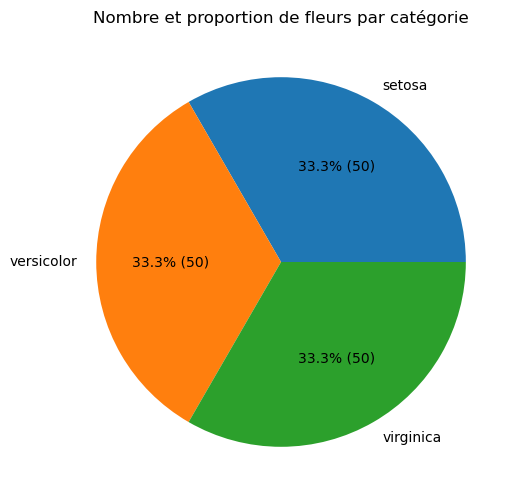

In [33]:
# Calculer la proportion et le nombre de chaque catégorie
# Calculer la proportion de chaque catégorie
prop_df = iris["species"].value_counts(normalize=True).reset_index()
prop_df.columns = ["species", "proportion"]  # Correction de "colomns" à "columns"

# Graphique en secteurs pour la fréquence de chaque catégorie
plt.figure(figsize=(8, 6))
ax = iris["species"].value_counts().plot(
    kind="pie",
    autopct=lambda x: f'{x:.1f}% ({int(x / 100 * len(iris))})'  # Afficher le pourcentage et le nombre
)

# Ajouter le titre
plt.title("Nombre et proportion de fleurs par catégorie")
plt.ylabel("")  # Supprimer l'étiquette de l'axe y (inutile pour un pie chart)
plt.show()  # Afficher le graphique

#### 3.2 Diagrammes adaptés pour les variables qualitatives ordinales

In [38]:
# Creer une variable qualitative ordinale
ordinal_var = tips["size"]

#### 3.2.1 Diagramme en baton

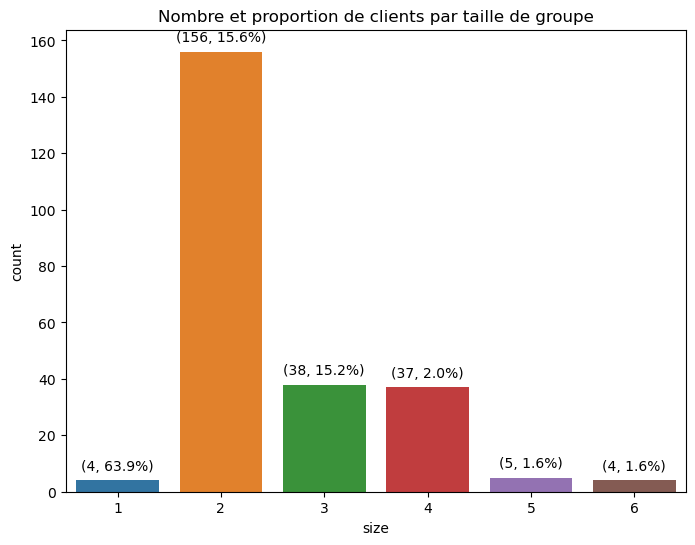

In [41]:
prop_df = tips["size"].value_counts(normalize=True).reset_index()
prop_df.columns = ["size", "proportion"]

# Graphique en barres pour la frequence de chaque catégorie
plt.figure(figsize=(8,6))
ax = sns.countplot(x="size", data= tips)
plt.title("Nombre et proportion de clients par taille de groupe")

# Ajouter le nombre et la proportion de chaque catégorie sur les barres
for p, prop, count in zip (ax.patches, prop_df["proportion"], tips["size"].value_counts().sort_index()):
    ax.annotate(
        f"({count}, {prop:.1%})",  # Afficher le nombre et la proportion en pourcentage
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position de l'annotation
        ha='center', va='center', xytext=(0, 10), textcoords='offset points'
    )

plt.show()  # Afficher le graphique


#### 3.2.2 Pie chart

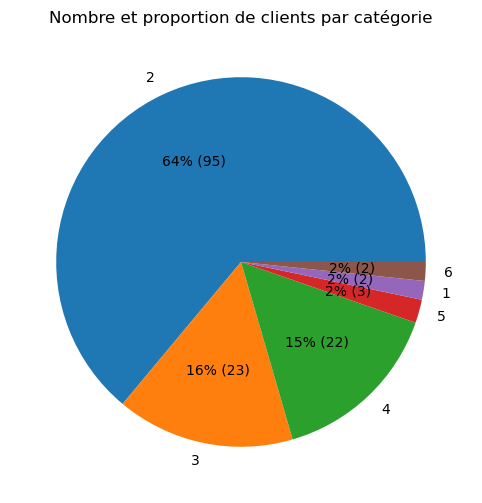

In [44]:
# Vous pouvez faire un boxplot seulement si la variable entre 3 et 7 modalités maximum

# Calculer la proportion de chaque catégorie
prop_df =tips["size"].value_counts(normalize=True).reset_index()
prop_df.columns = ["size", "proportion"]

# Graphique en secteurs pour la fréquence de chaque catégorie
plt.figure(figsize=(8, 6))
ax = tips["size"].value_counts().plot(
    kind="pie",
    autopct=lambda x: f'{x:.0f}% ({int(x / 100 * len(iris))})'  # Afficher le pourcentage et le nombre
)

# Ajouter le titre
plt.title("Nombre et proportion de clients par catégorie")
plt.ylabel("")  # Supprimer l'étiquette de l'axe y (inutile pour un pie chart)
plt.show()  # Afficher le graphique

#### 4 Graphiques adaptés pour les varaibles continues

#### 4.1 Grapiques adaptés pour les variables discrètes

#### 4.1.1 Histogramme

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

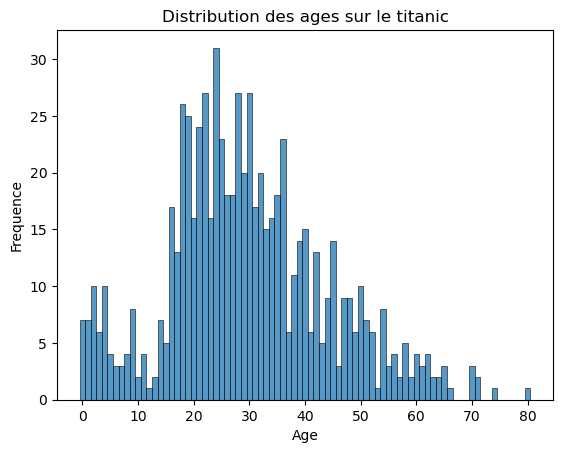

In [51]:
# Creer une variable quantitative discrete
age_var = titanic["age"].dropna().astype(int)

# Histogramme
sns.histplot(x=age_var, discrete=True)
plt.title("Distribution des ages sur le titanic")
plt.xlabel("Age")
plt.ylabel("Frequence")
plt.show

#### 4.1.2 Boxplot

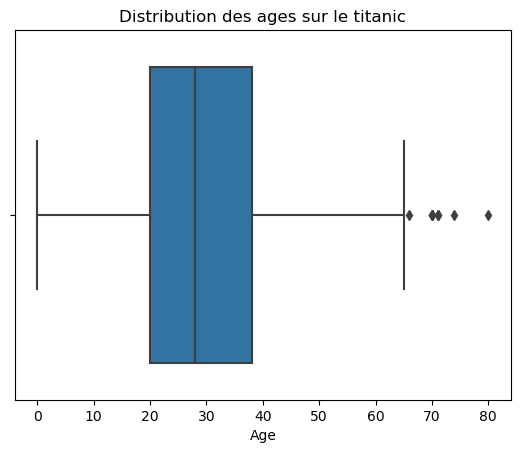

In [54]:
# Box plot
sns.boxplot(x=age_var)
plt.title("Distribution des ages sur le titanic")
plt.xlabel("Age")
plt.show()

#### 4.2 Graphique adaptés pour les variables continues

#### 4.2.1 Histogramme

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


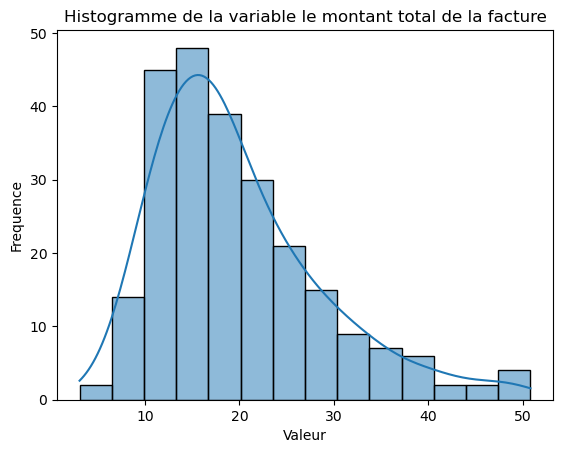

In [64]:
# Creer une variable quantitative continue
quant_var = tips["total_bill"]
# Histogramme
sns.histplot(x=quant_var, kde=True)
plt.title("Histogramme de la variable le montant total de la facture")
plt.xlabel("Valeur")
plt.ylabel("Frequence")
plt.show()

#### 4.2.2 Courbe  de densité Kde

C:\Users\brech\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


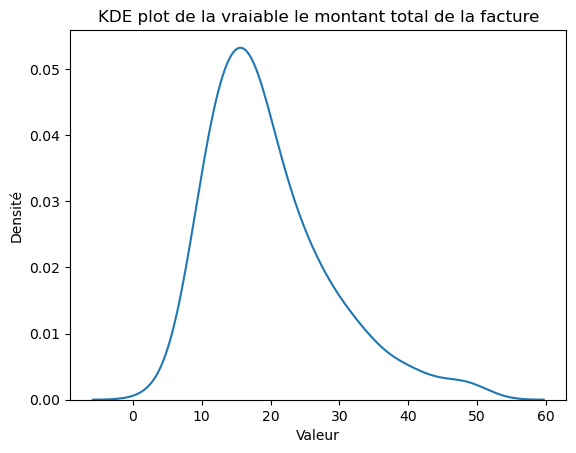

In [67]:
# KDE plot
sns.kdeplot(x=quant_var)
plt.title("KDE plot de la vraiable le montant total de la facture")
plt.xlabel("Valeur")
plt.ylabel("Densité")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

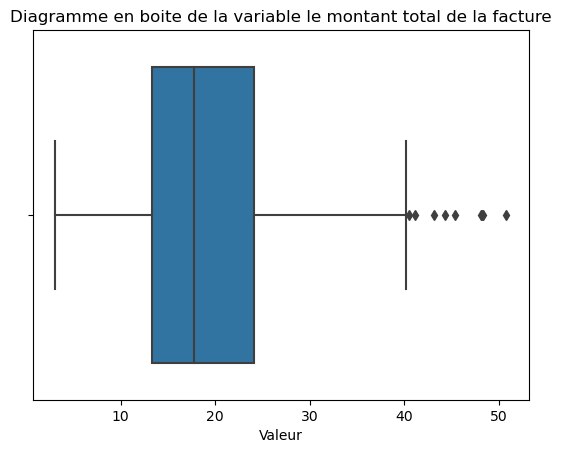

In [69]:
### Boite à moustaches (Box plot)
# Boite à moustache
# Diagramme en boite
sns.boxplot(x=quant_var)
plt.title("Diagramme en boite de la variable le montant total de la facture")
plt.xlabel("Valeur")
plt.show

## Statistiques en Python : Tendance centrale et Dispersion Expliquées

In [72]:
# Importation des bibliotheques necessaires
!pip install tabulate
import pandas as sns
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

#### 2. Chargement des données

In [75]:
# Chargement du dataset Iris
iris = sns.load_dataset('iris')
# Affichage des premieres lignes du dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


#### 3. Calcul des tendances centrales univariées

In [84]:
# Sélectionner uniquement les colonnes numériques
numeric_iris = iris.select_dtypes(include='number')

# Moyenne
mean = numeric_iris.mean()
print("Moyenne:\n", mean)

# Médiane
median = numeric_iris.median()
print("\nMédiane:\n", median)

# Mode
mode = numeric_iris.mode().iloc[0]  # Correction : utiliser .iloc[0] pour la première ligne du mode
print("\nMode:\n", mode)

# Calcul de la variance pour chaque variable
variance = numeric_iris.var()
print("\nVariance:\n", variance)

# Calcul des quantiles
quantiles = numeric_iris.quantile([0.25, 0.5, 0.75])
print("\nQuantiles:\n", quantiles)

Moyenne:
 sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Médiane:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

Mode:
 sepal_length    5.0
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

Variance:
 sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64

Quantiles:
       sepal_length  sepal_width  petal_length  petal_width
0.25           5.1          2.8          1.60          0.3
0.50           5.8          3.0          4.35          1.3
0.75           6.4          3.3          5.10          1.8


In [86]:
# Analyse des tendances centrales et de la dispersion
# Nous utiliserons la fonction describe() pour obtenir un résumé statistique de chaque variable

# Calcul du résumé statistique avec describe()
summary = iris.describe()

# Affichage d'un tableau bien formaté à l'aide de tabulate
print(tabulate(summary, headers='keys', tablefmt='fancy_grid', numalign ='center'))

╒═══════╤════════════════╤═══════════════╤════════════════╤═══════════════╕
│       │  sepal_length  │  sepal_width  │  petal_length  │  petal_width  │
╞═══════╪════════════════╪═══════════════╪════════════════╪═══════════════╡
│ count │      150       │      150      │      150       │      150      │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ mean  │    5.84333     │    3.05733    │     3.758      │    1.19933    │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ std   │    0.828066    │   0.435866    │     1.7653     │   0.762238    │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ min   │      4.3       │       2       │       1        │      0.1      │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ 25%   │      5.1       │      2.8      │      1.6       │      0.3      │
├───────┼────────────────┼───────────────┼────────────────┼───────────────┤
│ 50%   │   

In [92]:
# Affichage d'un taleau bien formaté à l'aide de tabulate
print(tabulate(summary, headers='keys', tablefmt='pipe', numalign='right'))

|       |   sepal_length |   sepal_width |   petal_length |   petal_width |
|:------|---------------:|--------------:|---------------:|--------------:|
| count |            150 |           150 |            150 |           150 |
| mean  |        5.84333 |       3.05733 |          3.758 |       1.19933 |
| std   |       0.828066 |      0.435866 |         1.7653 |      0.762238 |
| min   |            4.3 |             2 |              1 |           0.1 |
| 25%   |            5.1 |           2.8 |            1.6 |           0.3 |
| 50%   |            5.8 |             3 |           4.35 |           1.3 |
| 75%   |            6.4 |           3.3 |            5.1 |           1.8 |
| max   |            7.9 |           4.4 |            6.9 |           2.5 |


### 4.Dispersion via des boxplots

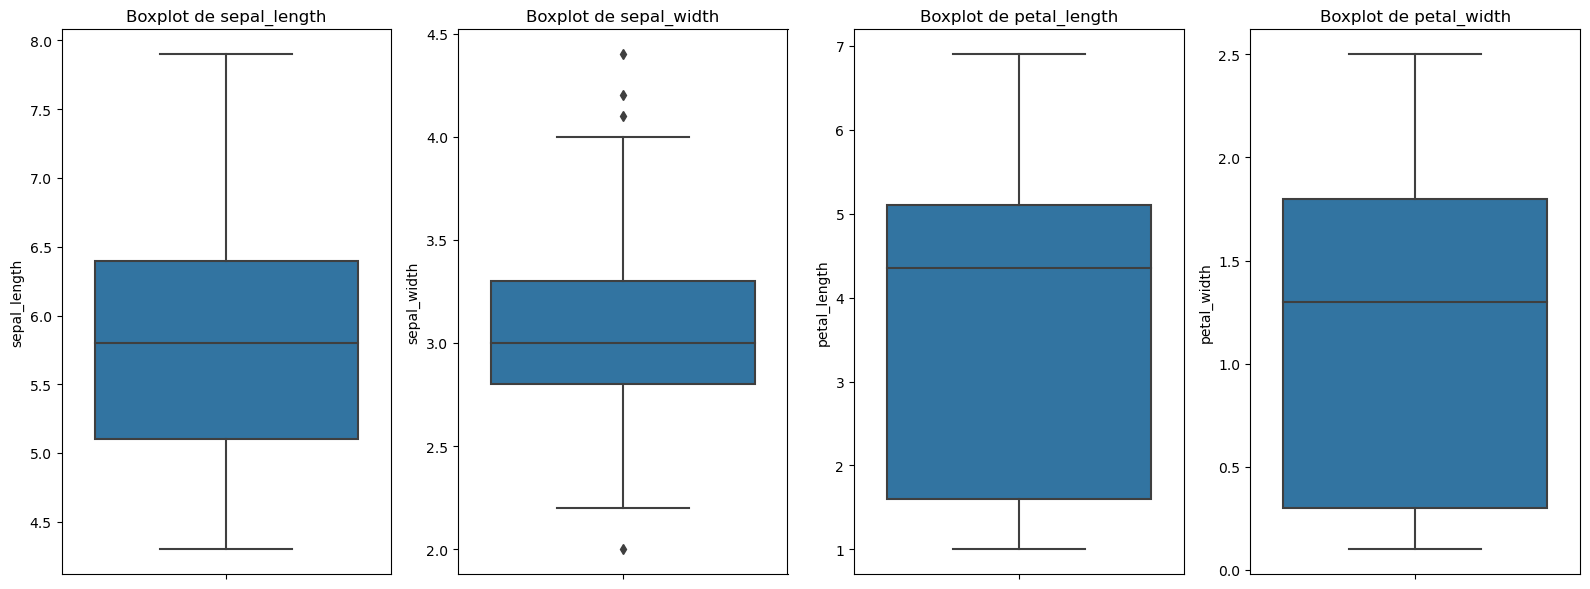

In [101]:
# Creation des boxplots univariés pour chaque variable numerique
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

for i, column in enumerate(iris.columns[:]):
    sns.boxplot(y=column, data=iris, ax=axes[i])
    axes[i].set_title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

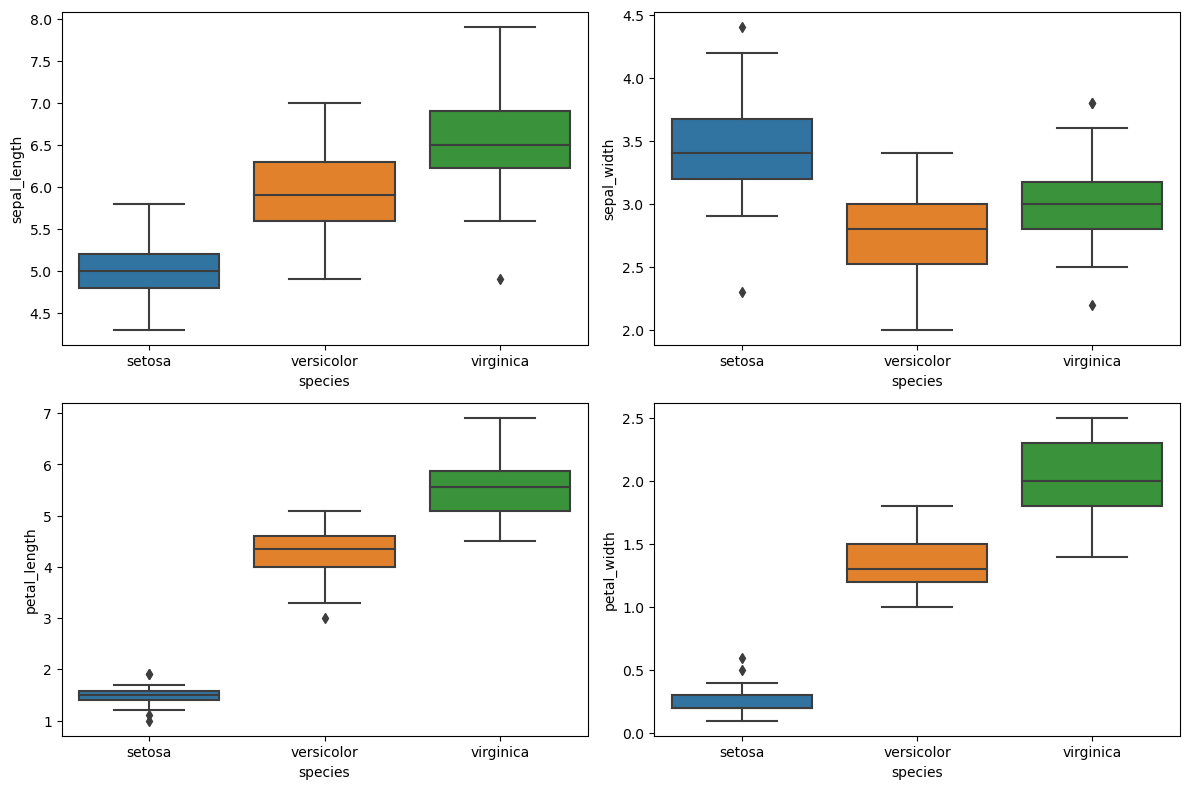

In [113]:
iris = sns.load_dataset('iris')
# Visualisation des tendances centrales et de la dispersion à l'aide de boxplots
figs,axes = plt.subplots(2, 2, figsize = (12, 8))

for i, column in enumerate(iris.columns[:-1]):
    sns.boxplot(x="species", y=column, data=iris, ax=axes[i//2, i%2])
plt.tight_layout()
plt.show

In [115]:
### Indicateur de tendance centrale et de dispersion (Petit resumé)

# - Inconvenient de la moyenne : il depend des valeurs extremes, il faut donc s'assurer que la base de données n'est pas trop de valeurs extremes
#  la moyenne est fiable s'il n'y a pas de valeur extreme (NB: on distingue plusieurs type : simple, pondéré, harmonique, quadratique)

# - la mediane : divise la base de données en deux parties egales ( 50% - 50%)

# - Le mode donne la valeur la plus frequente

### Pour les dispersions, on a trois types de variables ( variance, ecart-type, IIQR : Intervalle inter quartille)